In [1]:
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving Grassland_Fungi.csv to Grassland_Fungi.csv


In [39]:
df = pd.read_csv('Grassland_Fungi.csv')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3450 entries, 0 to 3449
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 3450 non-null   int64  
 1   Y                 3450 non-null   int64  
 2   OBJECTID          3450 non-null   int64  
 3   MINOFID           3450 non-null   int64  
 4   SITE              3450 non-null   object 
 5   VICECOUNTY        3450 non-null   int64  
 6   COUNTY            3450 non-null   object 
 7   COUNTRY           3450 non-null   object 
 8   GRIDREF           3450 non-null   object 
 9   PREFERREDE        3450 non-null   int64  
 10  PREFERREDN        3450 non-null   int64  
 11  C                 3450 non-null   int64  
 12  H                 3450 non-null   int64  
 13  E                 3450 non-null   int64  
 14  G                 3450 non-null   int64  
 15  D                 3450 non-null   int64  
 16  C_SSSI            3450 non-null   int64  


Below is a scatterplot of the 3450 waxcap sites in scotland between () and 31/12/2022

In [54]:

min_date = df['LASTVISIT'].min()
max_date = df['LASTVISIT'].max()

print('Minimum date:', min_date)
print('Maximum date:', max_date)

Minimum date:  
Maximum date: 31/12/2022


<Axes: xlabel='X', ylabel='Y'>

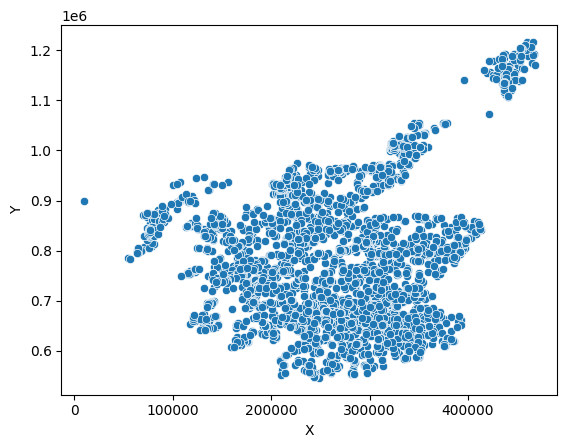

In [37]:
sns.scatterplot(data=df,x='X',y='Y')

The sites fall into 3 categories indicating grassland quality:

1.  RED: Any site passing any of the SSSI thresholds

2.  AMBER: Any site not passing any of the SSSI thresholds but with more than 11 species of Hygrocybe s.l. or with more than 4 IUCN species or with more than 4 indicator species.

3. GREEN: Any other site that has records of grassland fungi


RAG
Green    3153
Amber     181
Red        68
           48
Name: count, dtype: int64

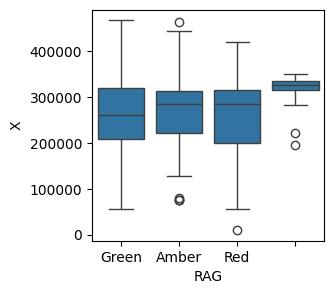

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
sns.boxplot(data=df,x='RAG',y='X')
df['RAG'].value_counts()


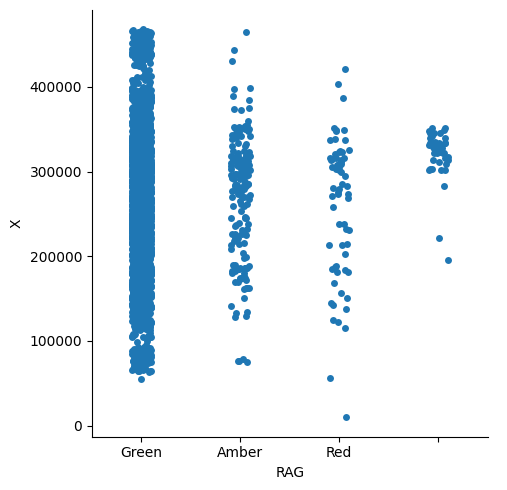

In [60]:
import warnings
warnings.filterwarnings('ignore')
sns.catplot(data=df,x='RAG',y='X')

Population density is represented by the graph below, where darker brown indicates larger populations of Waxcap species  

<Axes: xlabel='X', ylabel='Y'>

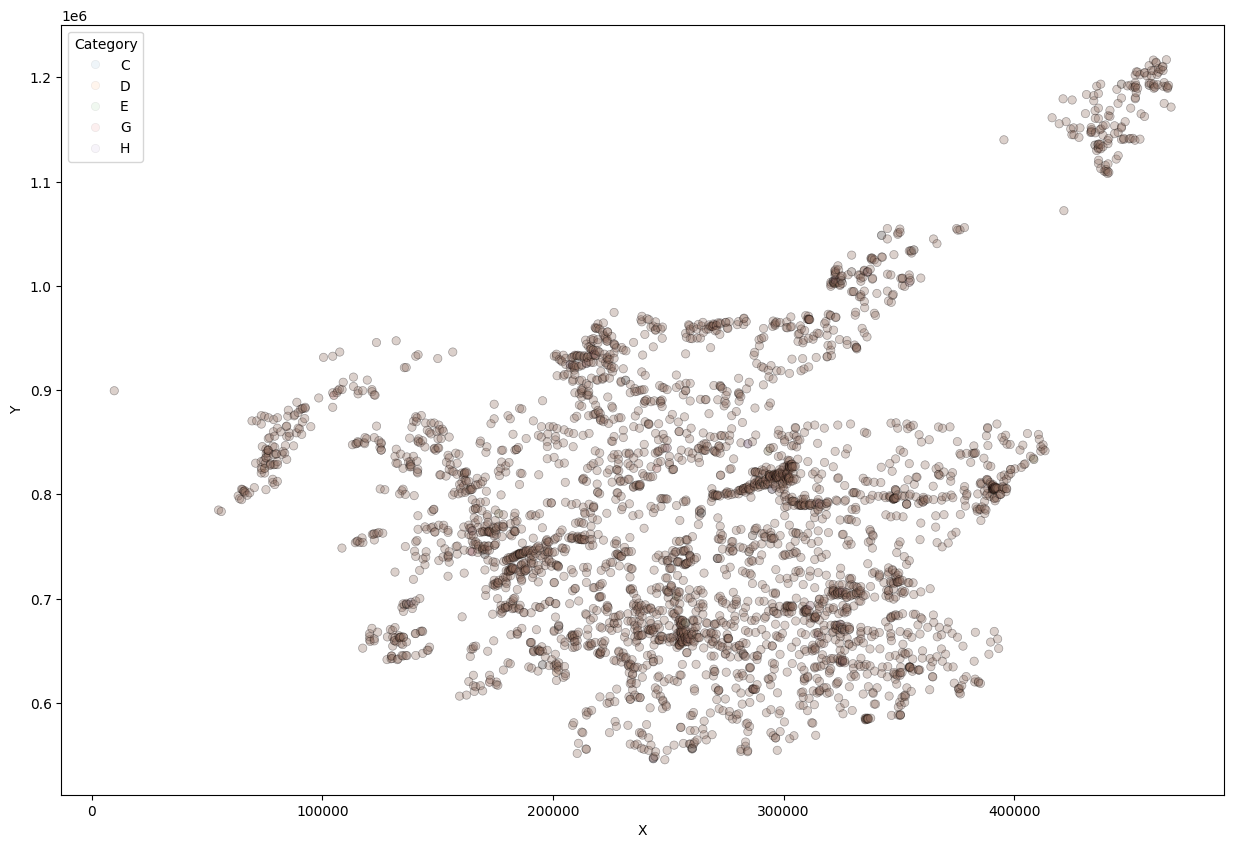

In [62]:
df  = df[['C', 'H', 'E', 'G','D','X','Y']]
melted_df = df.melt(id_vars=['X', 'Y'], value_vars=['C', 'H', 'E', 'G', 'D'], var_name='Category', value_name='Value')
value_counts = melted_df.groupby(['X', 'Y', 'Category'])['Value'].value_counts().reset_index(name='Count')
plt.figure(figsize=(15,10))
sns.scatterplot(data=value_counts,
                x='X', y='Y',

                hue='Category',alpha=0.07,edgecolor='black')

The line graph below displays the distribution of C, H, E, G and D species where Y represents latitude

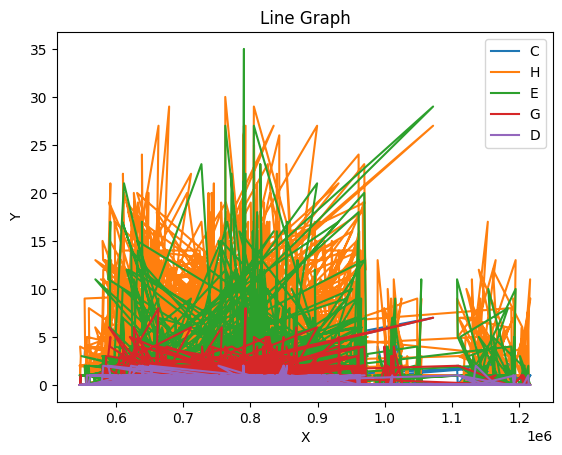

In [63]:
import matplotlib.pyplot as plt
Y = df[['Y']]
C = df[['C']]
H = df[['H']]
E = df[['E']]
G = df[['G']]
D = df[['D']]
plt.plot(Y, C, label='C')
plt.plot(Y, H, label='H')
plt.plot(Y, E, label='E')
plt.plot(Y, G, label='G')
plt.plot(Y, D, label='D')

# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line Graph')
plt.legend()

# Displaying the plot
plt.show()

In [64]:
dfratio = df[['C', 'H', 'E', 'G','D']]

ratios = []
for i in range(len(dfratio['C'])):
    row_total = sum([dfratio['C'][i], dfratio['H'][i], dfratio['E'][i], dfratio['G'][i], dfratio['D'][i]])
    ratio_C = dfratio['C'][i] / row_total
    ratio_H = dfratio['H'][i] / row_total
    ratio_E = dfratio['E'][i] / row_total
    ratio_G = dfratio['G'][i] / row_total
    ratio_D = dfratio['D'][i] / row_total
    ratios.append({'C': ratio_C, 'H': ratio_H, 'E': ratio_E, 'G': ratio_G, 'D': ratio_D})

Clist = []
Hlist = []
Elist = []
Glist = []
Dlist = []
for idx, ratio in enumerate(ratios, 1):
    Clist.append(ratio['C'])
    Hlist.append(ratio['H'])
    Elist.append(ratio['E'])
    Glist.append(ratio['G'])
    Dlist.append(ratio['D'])

new_df = pd.DataFrame({
    'Column_C': Clist,
    'Column_H': Hlist,
    'Column_E': Elist,
    'Column_G': Glist,
    'Column_D': Dlist
}, index=df['Y'])

print(new_df)

new_df = new_df.reset_index()


        Column_C  Column_H  Column_E  Column_G  Column_D
Y                                                       
806625  0.000000  1.000000  0.000000       0.0       0.0
806050  0.000000  1.000000  0.000000       0.0       0.0
805350  0.000000  1.000000  0.000000       0.0       0.0
805815  0.000000  1.000000  0.000000       0.0       0.0
807050  0.000000  1.000000  0.000000       0.0       0.0
...          ...       ...       ...       ...       ...
672500  0.000000  1.000000  0.000000       0.0       0.0
725500       NaN       NaN       NaN       NaN       NaN
627650  0.230769  0.769231  0.000000       0.0       0.0
630500  0.666667  0.000000  0.333333       0.0       0.0
622818  0.133333  0.600000  0.266667       0.0       0.0

[3450 rows x 5 columns]
           Y  Column_C  Column_H  Column_E  Column_G  Column_D
0     806625  0.000000  1.000000  0.000000       0.0       0.0
1     806050  0.000000  1.000000  0.000000       0.0       0.0
2     805350  0.000000  1.000000  0.000000   

A complete statistical analysis of the significance of latitude on the distribution of the 5 Waxcap varieties shows that;

1. Latitude has a significant negative affect on C, H and D species
2. Latitude has a significant positive affects on E species
3. Latitude has no significant affect on G species

In [66]:
import statsmodels.api as sm

for column in new_df:
    new_df[column] = new_df[column].fillna(0)

for column in ['Column_C', 'Column_H', 'Column_E', 'Column_G', 'Column_D']:
    X = df['Y'] # Independent variable (latitude)
    y = new_df[column]  # Dependent variable (column data)

    # Add constant term to the independent variable
    X = sm.add_constant(X)

    # Fit the linear regression model
    model = sm.OLS(y, X).fit()

    # Print summary of regression results

    print(f"Regression results for {column}:")
    print("---------------------------------------------------")
    print(model.summary())
    print("\nAnalysis:")

    # Extract relevant information from summary
    coef = model.params['Y']  # Coefficient for latitude
    p_value = model.pvalues['Y']  # p-value for latitude coefficient
    r_squared = model.rsquared  # R-squared value

    # Print analysis based on results
    if p_value < 0.05:
        if coef > 0:
            print("There is a statistically significant positive relationship between latitude and", {column})
        else:
            print("There is a statistically significant negative relationship between latitude and", {column})
        print("R-squared:", r_squared)
    else:
        print("There is no statistically significant relationship between latitude and", column)
    print("\n")

Regression results for Column_C:
---------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:               Column_C   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.310
Date:                Wed, 12 Jun 2024   Prob (F-statistic):            0.00397
Time:                        09:02:52   Log-Likelihood:                 256.83
No. Observations:                3450   AIC:                            -509.7
Df Residuals:                    3448   BIC:                            -497.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------